In [1]:
%%html
<style> 
a {text-decoration: none !important;}
li {line-height: 1.5}
</style>

# Content:<a id='top'></a>

### [Data Preparation](#1)


### [Data Analysis](#Data-Analytics)

#### 1. [S&P500 Performance of Each Monetary Policy Phase](#2_1)

* [Table: Summary of Each FF Rate Phase](#FFR01_Table)    
    
* [Bar: S&P500 Perf. segmented by three phases (%CH from start and end of each pahse)](#FFR01_Bar01)
        
* [Bar: S&P500 Perf. segmented by three phases (%CH normalized by yearly perf.)](#FFR01_Bar02)
      
      
#### 2. [Detailed Development of S&P500 During Each Monetary Policy Period](#2_2)

* [Table: Summary of Each FF Rate Phase(Added Peak & Bottom)](#FFR02_Table)


* [Tightening Phase](#2_tight)
    * [Ridge: Development of S&P500](#FFR02_Tight_Ridge)
        
    * [Table: Summary of S&P500 Perf.](#FFR02_Tight_Table)
        
    * [Boxplot: Destribution of S&P500 Perf. (Tightening Start Day = 0%)](#FFR02_Tight_Box)
        
    * [Table: Summary of Statistics](#FFR02_Tight_BasicStat_Table)
        
    * [Ridge now: Development of S&P500 (Added some notations)](#FFR02_Tight_Ridge_Now)


* [Easing Phase](#2_ease)
    * [Ridge: Development of S&P500](#FFR02_Ease_Ridge)
       
    * [Table: Summary of S&P500 Perf.](#FFR02_Ease_Table)


* [Pausing Phase](#2_pause)
    * [Ridge: Development of S&P500](#FFR02_Pause_Ridge) 
    
    * [Table: Summary of S&P500 Perf.](#FFR02_Pause_Table)
    
 
        
#### 3. [Performance of US Major Indices From Starting Fed Funds Rate Hike to Different Time Periods in 1983-2022](#2_3)



### [Reference](#reference)

<br>
<hr style="border:0.5px solid brack">
<br>

# Data Preparation <a id='1'></a>

[top](#top)

In [2]:
import numpy as np
import pandas as pd
from pandas import option_context
import dataframe_image as dfi
import imgkit
import seaborn as sns
sns.set_style("darkgrid", {"axes.facecolor": ".975"})
sns.set_style({'font.family':'serif', 'font.serif':['Times New Roman']})
import matplotlib.pyplot as plt
import matplotlib.gridspec as grid_spec
from matplotlib import ticker
from matplotlib.colors import LinearSegmentedColormap
plt.rcParams["font.family"] = "Times New Roman"
from datetime import datetime

import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [3]:
# download sp500 data
sp500 = pd.read_excel('../../data/Stock_Indices.xlsx', sheet_name="^GSPC").dropna(thresh=7) 

start_date = sp500.iloc[0]['Date']
end_date = sp500.iloc[-1]['Date']
sp500_df = pd.DataFrame()
sp500_df['Date'] = pd.date_range(start=start_date, end=end_date)
sp500_df = sp500_df.merge(right=sp500, how='left', on='Date').fillna(method='ffill')
sp500_df # including closing day

,Date,Open,High,Low,Close,Change%,Volume(SPY),PER,Shiller_PER
0,1950-01-03,16.660000,16.660000,16.660000,16.660000,NaN,NaN,7.220000,10.750000
1,1950-01-04,16.850000,16.850000,16.850000,16.850000,1.140459,NaN,7.302341,10.872599
2,1950-01-05,16.930000,16.930000,16.930000,16.930000,0.474777,NaN,7.337011,10.924220
3,1950-01-06,16.980000,16.980000,16.980000,16.980000,0.295329,NaN,7.358679,10.956482
4,1950-01-07,16.980000,16.980000,16.980000,16.980000,0.295329,NaN,7.358679,10.956482
...,...,...,...,...,...,...,...,...,...
26709,2023-02-18,4077.389893,4081.510010,4047.949951,4079.090088,-0.280000,89169100.0,21.805532,29.628588
26710,2023-02-19,4077.389893,4081.510010,4047.949951,4079.090088,-0.280000,89169100.0,21.805532,29.628588
26711,2023-02-20,4077.389893,4081.510010,4047.949951,4079.090088,-0.280000,89169100.0,21.805532,29.628588
26712,2023-02-21,4052.350098,4052.350098,3995.189941,3997.340088,-2.000000,82511300.0,21.368522,29.034795


In [4]:
# download Nasdaq100 data
ndq100 = pd.read_excel('../../data/Stock_Indices.xlsx', sheet_name="^NDX").dropna(how='all')
ndq100

,Date,Open,High,Low,Close,Change%,Volume(QQQ)
0,1985-10-01,110.620000,112.160004,110.565002,112.140000,NaN,NaN
1,1985-10-02,112.140000,112.540001,110.779999,110.820000,-1.177100,NaN
2,1985-10-03,110.840000,111.184998,110.120003,110.870000,0.045118,NaN
3,1985-10-04,110.870000,110.870003,109.855003,110.070000,-0.721566,NaN
4,1985-10-07,110.070000,110.135002,108.175003,108.200000,-1.698919,NaN
...,...,...,...,...,...,...,...
9420,2023-02-15,12531.599609,12689.339844,12486.419922,12687.889648,0.770000,43100600.0
9421,2023-02-16,12495.070312,12653.400391,12440.000000,12442.480469,-1.930000,59129200.0
9422,2023-02-17,12352.299805,12385.519531,12233.790039,12358.179688,-0.680000,57071900.0
9423,2023-02-21,12205.209961,12257.059570,12058.230469,12060.299805,-2.410000,46366600.0


In [5]:
# download Dow Jones Industrial Average
dji = pd.read_excel('../../data/Stock_Indices.xlsx', sheet_name="^DJI").dropna(how='all')
dji

,Date,Open,High,Low,Close,Change%,Volume(DIA)
0,1980-01-02,838.740000,841.200000,822.340000,824.570000,-1.69,NaN
1,1980-01-03,824.560000,827.730000,809.050000,820.310000,-0.52,NaN
2,1980-01-04,820.310000,833.530000,819.030000,828.840000,1.04,NaN
3,1980-01-07,828.840000,839.840000,824.730000,832.000000,0.38,NaN
4,1980-01-08,832.000000,853.670000,828.840000,851.710000,2.37,NaN
...,...,...,...,...,...,...,...
10875,2023-02-15,34008.628906,34130.488281,33833.101562,34128.050781,0.11,1967700.0
10876,2023-02-16,33992.089844,34041.160156,33686.589844,33696.851562,-1.26,3227200.0
10877,2023-02-17,33677.011719,33846.640625,33517.730469,33826.691406,0.39,3031800.0
10878,2023-02-21,33699.691406,33699.691406,33115.738281,33129.589844,-2.06,3139600.0


In [6]:
rut2000 = pd.read_excel('../../data/Stock_Indices.xlsx', sheet_name="^RUT").dropna(how='all')
rut2000

,Date,Open,High,Low,Close,Change%,Volume(IWN)
0,1987-09-10,167.440002,168.979996,167.440002,168.970001,NaN,NaN
1,1987-09-11,168.970001,170.539993,168.750000,170.539993,0.929154,NaN
2,1987-09-14,170.529999,170.949997,170.149994,170.429993,-0.064501,NaN
3,1987-09-15,170.419998,170.440002,169.130005,169.199997,-0.721701,NaN
4,1987-09-16,169.309998,170.029999,168.820007,168.919998,-0.165484,NaN
...,...,...,...,...,...,...,...
8929,2023-02-15,1929.729980,1960.969971,1924.910034,1960.969971,1.090000,1273800.0
8930,2023-02-16,1946.050049,1962.459961,1933.140015,1942.209961,-0.960000,1695000.0
8931,2023-02-17,1943.640015,1947.849976,1928.390015,1946.359985,0.210000,899100.0
8932,2023-02-21,1937.050049,1937.050049,1888.209961,1888.209961,-2.990000,1029000.0


In [7]:
# load Fed Target Rate
target = pd.read_csv('../Data_File/Fed_Funds_Target_Rate.csv')
target['Date'] = pd.to_datetime(target['Date'])
target

,Date,FF_Rate
0,1971-01-01,NaN
1,1971-01-02,NaN
2,1971-01-03,NaN
3,1971-01-04,NaN
4,1971-01-05,NaN
...,...,...
19039,2023-02-16,4.75
19040,2023-02-17,4.75
19041,2023-02-18,4.75
19042,2023-02-19,4.75


In [8]:
# create new df
df = pd.DataFrame()
df['Date'] = pd.date_range(start='1/1/1971', end='2023-02-17')

df_lst = [sp500, ndq100, dji, rut2000]
col_lst = ['SP500', 'NDQ100', 'DJI', 'RUT2000']
for i in range(4):
    df = df.merge(right=df_lst[i][['Date', 'Close']], how='left', on='Date').fillna(method='ffill')
    df.rename(columns = {'Close': col_lst[i]}, inplace = True)

# combine df and Fed target rate
df = df.merge(right=target, how='left', on='Date')

df

,Date,SP500,NDQ100,DJI,RUT2000,FF_Rate
0,1971-01-01,NaN,NaN,NaN,NaN,NaN
1,1971-01-02,NaN,NaN,NaN,NaN,NaN
2,1971-01-03,NaN,NaN,NaN,NaN,NaN
3,1971-01-04,91.150002,NaN,NaN,NaN,NaN
4,1971-01-05,91.800003,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
19036,2023-02-13,4137.290039,12502.313477,34245.929688,1941.143311,4.75
19037,2023-02-14,4136.129883,12590.889648,34089.269531,1939.910034,4.75
19038,2023-02-15,4147.600098,12687.889648,34128.050781,1960.969971,4.75
19039,2023-02-16,4090.409912,12442.480469,33696.851562,1942.209961,4.75


In [40]:
# show the development of Target Rate in detail
fig = make_subplots()
fig.add_trace(go.Scatter(x=df['Date'].values, y=df['FF_Rate'].values, name='FF Rate'))

<br>
<hr style="border:0.5px solid brack">
<br>

# Data Analytics <a id='2'></a>

### (1) S&P500 Performance of Each Monetary Policy Phase Based on the Change in Federal Funds (FF) Rate; Historical Data from 1971-2022. <a id='2_1'></a>

[top](#top)

In [41]:
# Define the Federal Funds (FF) rate phase by myself
df['FFR_Phase01'] = np.nan

"""
'Tightening': 
    - Starting from the day of the first FF rate hike to one day before cutting the FF rate.
    - Between the previous FF rate hike and the next hike is less than 1 year, otherwise, the start date will reset.
    - As long as both two conditions are satisfied, the phase will be maintained, otherwise ends the phase at recent peak;
        1. The FF rate reaches or exceeds the recent peak in less than 1 year.
        2. The % of the FF rate decrease from the recent peak is less than 5%.
    - When this phase finishes based on the above two conditions, must be satisfied with the following conditions;
        the tightening period is more than 6-month or the % of FF rate increase >= 3%.
        
'Easing': 
    - Starting from the day of the first rate cut to one day before hiking the FF rate.
    - Between the previous FF rate cut and the next cut is less than 1 year, otherwise, the start date will reset.
    - As long as two conditions are satisfied, the phase will be maintained, otherwise ends the phase at the recent bottom;
        1. The FF rate reaches or falls below the recent bottom in less than 1 year.
        2. The % of the FF rate increase from the recent bottom is less than 5%.
    - When this phase finishes based on the above two conditions, must be satisfied with the following conditions;
        the easing period is more than 6-month or the % of FF rate decrease >= 3%.   
        
'Pause': 
    - Starting from the right after the end of "Easing" phase to the before starting "Tightening" phase.
    - Must be satisfied with the either one of the conditions:
        The FF rate was maintained the same level or the level within +-0.5% for more than 1 year.
        The FF rate was maintained witnin the +-1.0% based on the start date of 'Pausing' phase for more than 3 year
    - Must be definded right after the 'Easing' phase.
    
"""
start_phase_lst = [ # 1st: start date, 2nd: name of IR phase 
    ['1971-01-01', 'Pausing'], ['1972-03-01', 'Tightening'], ['1974-07-01', 'Easing'], ['1975-10-02', 'Pausing'],
    ['1976-12-01', 'Tightening'], ['1980-04-01', 'Easing'], ['1980-08-07', 'Tightening'], ['1981-06-01', 'Easing'], 
    ['1983-05-02', 'Tightening'], ['1984-09-20', 'Easing'], ['1986-12-04', 'Tightening'], ['1989-06-06', 'Easing'], 
    ['1992-09-05', 'Pausing'], ['1994-02-04', 'Tightening'], ['1995-07-06', 'Easing'], ['1996-02-01', 'Pausing'], 
    ['1999-06-30', 'Tightening'], ['2001-01-03', 'Easing'], ['2002-11-07', 'Pausing'], ['2004-06-30', 'Tightening'], 
    ['2007-09-18', 'Easing'], ['2008-12-17', 'Pausing'], ['2016-12-14', 'Tightening'], ['2019-08-01', 'Easing'], 
    ['2020-03-17', 'Pausing'], ['2022-03-17', 'Tightening']
]

for d_lst in start_phase_lst:
    df.loc[(df['Date'] == d_lst[0]), 'FFR_Phase01'] = d_lst[1]

# filling NaN by the forward method 
df['FFR_Phase01'] = df['FFR_Phase01'].fillna(method='ffill')
# filling the rest of NaN as 'Other'
df['FFR_Phase01'] = df['FFR_Phase01'].fillna('Other')

# remove any row which has more than three NaN and reset_index
df.dropna(thresh=2, inplace=True)
df.reset_index(drop=True, inplace=True)
df

,Date,SP500,NDQ100,DJI,RUT2000,FF_Rate,FFR_Phase01
0,1971-01-01,NaN,NaN,NaN,NaN,NaN,Pausing
1,1971-01-02,NaN,NaN,NaN,NaN,NaN,Pausing
2,1971-01-03,NaN,NaN,NaN,NaN,NaN,Pausing
3,1971-01-04,91.150002,NaN,NaN,NaN,NaN,Pausing
4,1971-01-05,91.800003,NaN,NaN,NaN,NaN,Pausing
...,...,...,...,...,...,...,...
19036,2023-02-13,4137.290039,12502.313477,34245.929688,1941.143311,4.75,Tightening
19037,2023-02-14,4136.129883,12590.889648,34089.269531,1939.910034,4.75,Tightening
19038,2023-02-15,4147.600098,12687.889648,34128.050781,1960.969971,4.75,Tightening
19039,2023-02-16,4090.409912,12442.480469,33696.851562,1942.209961,4.75,Tightening


In [42]:
# export DataFrame as csv file
#df[['Date', 'SP500', 'FF_Rate', 'FFR_Phase01']].to_csv('FFR01.csv', index=False)

In [43]:
# create new df
"""
(1) FF Rate Phase:     One of three interest rate phases; Tightening, Easing, Pausing
(2) Start Date:     Date of starting the new rate phase
(3) End Date:       Date of ending the rate phase
(4) Period of Years:    How long each rate phase is (year)
(5) %Chg S&P500:   Percentage change S&P500 from start_date to end_date.
(6) %Chg / Periods: Estimated yearly percentage change S&P500 from start_date and end_date; calculated by (5) / (4)
"""

df_01 = pd.DataFrame(columns=['FF Rate Phase', 'Start Date', 'End Date', 'Period of Years', '%Chg S&P500', '%Chg / Periods'])
current_phase = df.loc[0, 'FFR_Phase01']
values = [] # all column's values defined above
index = 0
for i in range(len(df)):
    if df.loc[i, 'FFR_Phase01'] != current_phase:
        # once the list's items are two, start calculating performance of each phase  
        if len(values) == 2:
            # 'i' will be the row data about the next phase
            values.append(df.loc[i-1, 'Date'])
            # get the S&P500 close price on the start day of the phase 
            start = float(df.loc[df.Date == values[1], 'SP500'].values)
            # get the S&P500 close price on the end day the phase
            end =  float(df.loc[df.Date == values[2], 'SP500'].values)
            # calculate the period of the phase (year, decimal)
            period_year = (values[2] - values[1]).days / 365 
            values.append(round(period_year, 2))
            # calculate the % chg of S&P500 from start to end of each phase
            chg = float((end-start)/start * 100)
            values.append(round(chg, 2))
            # calculate th yearly % chg of S&P500 each phase
            values.append(round(chg/period_year, 2))
            # add all items in the list to DataFrame 
            df_01.loc[index] = values
            index += 1
        # update the current rate phase    
        current_phase = df.loc[i, 'FFR_Phase01']
        # reset the values
        values = []
        # append the current rate phase
        values.append(current_phase)
        # append the start date of the rate phase
        values.append(df.loc[i, 'Date'])

        
# function to return whether the start_date is over 2000 ot not
def century(date):
    if date.year <= 2000:
        return '20c'
    else:
        return '21c'

# apply function
df_01['Start Century'] = df_01['Start Date'].apply(century)

#### Table: Summarry of Each FF Rate Phase (Start/End dates, Period/Perf., Century) <a id='FFR01_Table'></a>

In [44]:
# load dataframe as the impage
#dfi.export(obj=df_01, filename='FFR01_Table.png', fontsize=9, table_conversion='matplotlib')

df_01

,FF Rate Phase,Start Date,End Date,Period of Years,%Chg S&P500,%Chg / Periods,Start Century
0,Tightening,1972-03-01,1974-06-30,2.33,-19.89,-8.53,20c
1,Easing,1974-07-01,1975-10-01,1.25,-3.59,-2.87,20c
2,Pausing,1975-10-02,1976-11-30,1.16,21.81,18.73,20c
3,Tightening,1976-12-01,1980-03-31,3.33,-0.39,-0.12,20c
4,Easing,1980-04-01,1980-08-06,0.35,18.96,54.48,20c
5,Tightening,1980-08-07,1981-05-31,0.81,7.53,9.26,20c
6,Easing,1981-06-01,1983-05-01,1.92,24.18,12.63,20c
7,Tightening,1983-05-02,1984-09-19,1.39,2.98,2.15,20c
8,Easing,1984-09-20,1986-12-03,2.20,51.58,23.42,20c
9,Tightening,1986-12-04,1989-06-05,2.50,27.26,10.89,20c


#### Bar01: S&P500 Perf. segmented by three phases (%CH from start and end of each pahse)<a id='FFR01_Bar01'></a>

Text(0, 0.5, '% Change')

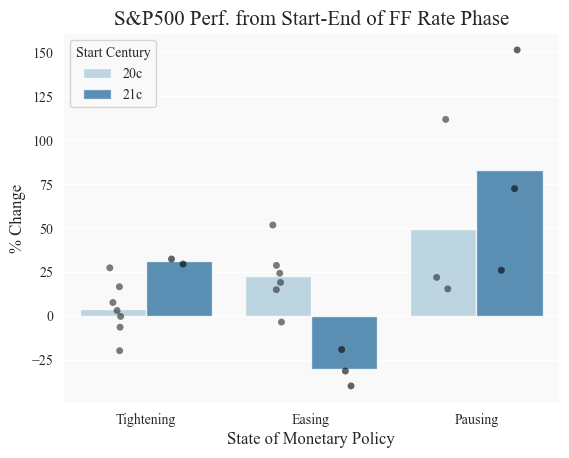

In [45]:
# bar plot
ax = sns.barplot(data=df_01, x='FF Rate Phase', y='%Chg S&P500', hue='Start Century',
                 estimator=np.mean, palette='Paired', errorbar=None, alpha=0.8)

# show each data point
sns.stripplot(data=df_01, x='FF Rate Phase', y='%Chg S&P500', hue='Start Century',
              dodge=True, alpha=0.6, palette='dark:black', ax=ax)

# Remove unnessary labels
h, l = ax.get_legend_handles_labels()
ax.legend(h[2:], l[2:], title='Start Century')


plt.title('S&P500 Perf. from Start-End of FF Rate Phase', fontsize=15)
plt.xlabel('State of Monetary Policy', fontsize=12)
plt.ylabel('% Change', fontsize=12)

# save graph
#plt.savefig("FFR01_Bar01.png")

#### Bar02: S&P500 Perf. Segmented by Three Phases (%CH Normalized by Yearly Perf.)<a id='FFR01_Bar02'></a>

Text(0, 0.5, '% Change')

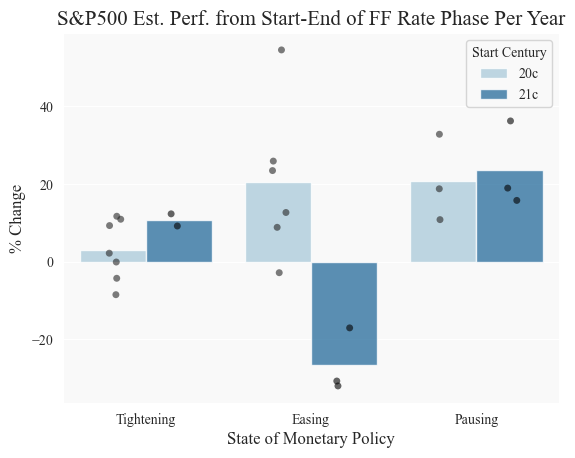

In [46]:
# bar plot
ax = sns.barplot(data=df_01, x='FF Rate Phase', y='%Chg / Periods', hue='Start Century',
                 estimator=np.mean, palette='Paired', errorbar=None, alpha=0.8)

# show each data point
sns.stripplot(data=df_01, x='FF Rate Phase', y='%Chg / Periods', hue='Start Century',
              dodge=True, alpha=0.6, palette='dark:black', ax=ax)

# Remove unnessary labels
h, l = ax.get_legend_handles_labels()
ax.legend(h[2:], l[2:], title='Start Century')

plt.title('S&P500 Est. Perf. from Start-End of FF Rate Phase Per Year', fontsize=15)
plt.xlabel('State of Monetary Policy', fontsize=12)
plt.ylabel('% Change', fontsize=12)

# save graph
#plt.savefig("FFR01_Bar02.png")

#### Additional Info of this Plot:

- The performance of the S&P500 is based on the difference between the closing price of each rate state's start day and the closing price of each rate state's end day (referred to the table above). 


- In terms of the second barplot (Yearly), the outcomes are the division of the results of the first graph by the period of each rate phase, then calculate the average change of each rate phase.

<br>
<hr style="border:0.5px solid brack">
<br>

### (2) Detailed Development of S&P500 During Each Monetary Policy <a id='2_2'></a>
    
[top](#top)

In [47]:
# Dataframe is based on df_01

# copy & remove unessary data
df_02 = df_01.copy()
df_02 = df_02.drop(['Period of Years', '%Chg / Periods', 'Start Century'], axis=1)

# show results
df_02.columns

Index(['FF Rate Phase', 'Start Date', 'End Date', '%Chg S&P500'], dtype='object')

In [48]:
# get max fall.rise rate during specific periods
def max_fall_rise(row, df_sp500):
    start_date = row['Start Date']
    end_date = row['End Date']
    phase = df_sp500.loc[(df_sp500.Date >= start_date) & (df_sp500.Date <= end_date)]
    start_price = phase.iloc[0]['Close'] # 'Close' price of the start day    
    bottom_price = min(phase['Low'])        # minimum 'Low' price
    peak_price = max(phase['High'])       # maximum 'High' price
    bottom_date = phase[phase.Low == bottom_price].iloc[0]['Date'] # 1st date of reaching bottom    
    peak_date = phase[phase.High == peak_price].iloc[0]['Date']    # 1st date of reaching peak
    days_till_bottom = (bottom_date - start_date).days
    days_till_peak = (peak_date - start_date).days   
    fall_rate = round((bottom_price - start_price) / start_price * 100, 2) # calculate % change    
    rise_rate = round((peak_price - start_price) / start_price * 100, 2) # calculate % change

    
    return pd.Series([days_till_bottom, fall_rate, days_till_peak, rise_rate])

def days_start_end(row):
    start_date = row['Start Date']
    end_date = row['End Date']
    return (end_date - start_date).days

df_02[['Bottom(AfterDays)', 'Bottom(%)', 'Peak(AfterDays)', 'Peak(%)']] = df_02.apply(func=max_fall_rise, df_sp500=sp500, axis=1)
df_02.insert(loc=3, column='Period(Days)', value=df_02.apply(func=days_start_end, axis=1))
df_02

,FF Rate Phase,Start Date,End Date,Period(Days),%Chg S&P500,Bottom(AfterDays),Bottom(%),Peak(AfterDays),Peak(%)
0,Tightening,1972-03-01,1974-06-30,851,-19.89,849.0,-20.70,316.0,13.40
1,Easing,1974-07-01,1975-10-01,457,-3.59,95.0,-29.13,379.0,12.28
2,Pausing,1975-10-02,1976-11-30,425,21.81,0.0,-1.19,356.0,29.71
3,Tightening,1976-12-01,1980-03-31,1216,-0.39,455.0,-15.65,1169.0,17.30
4,Easing,1980-04-01,1980-08-06,127,18.96,20.0,-3.16,120.0,21.29
5,Tightening,1980-08-07,1981-05-31,297,7.53,22.0,-1.82,111.0,15.13
6,Easing,1981-06-01,1983-05-01,699,24.18,434.0,-22.82,697.0,24.18
7,Tightening,1983-05-02,1984-09-19,506,2.98,450.0,-9.16,161.0,6.50
8,Easing,1984-09-20,1986-12-03,804,51.58,20.0,-4.45,804.0,52.19
9,Tightening,1986-12-04,1989-06-05,914,27.26,320.0,-14.46,264.0,33.53


In [49]:
# add the current data
rate_phase = 'Tightening'
start_date =  pd.to_datetime('2022-03-17')
latest_date = sp500.iloc[-1].Date
days_start_end = (latest_date - start_date).days
start_price = int(sp500[sp500.Date == start_date].Close)
latest_price = int(sp500[sp500.Date == latest_date].Close)
per_change = round((latest_price - start_price) / start_price * 100, 2)
row = pd.DataFrame(data = [[rate_phase, start_date, latest_date, days_start_end, per_change]], 
                   columns = ['FF Rate Phase', 'Start Date', 'End Date', 'Days start-end', '%Chg S&P500'])
apply_result = row.apply(func=max_fall_rise, df_sp500=sp500, axis=1)

df_02.loc[len(df_02)] = list(row.loc[0]) + list(apply_result.loc[0])

#### Table: Summary of Each FF Rate Phase(Added to Info about Peak & Bottom) <a id='FFR02_Table'></a>

In [50]:
df_02

,FF Rate Phase,Start Date,End Date,Period(Days),%Chg S&P500,Bottom(AfterDays),Bottom(%),Peak(AfterDays),Peak(%)
0,Tightening,1972-03-01,1974-06-30,851,-19.89,849.0,-20.70,316.0,13.40
1,Easing,1974-07-01,1975-10-01,457,-3.59,95.0,-29.13,379.0,12.28
2,Pausing,1975-10-02,1976-11-30,425,21.81,0.0,-1.19,356.0,29.71
3,Tightening,1976-12-01,1980-03-31,1216,-0.39,455.0,-15.65,1169.0,17.30
4,Easing,1980-04-01,1980-08-06,127,18.96,20.0,-3.16,120.0,21.29
5,Tightening,1980-08-07,1981-05-31,297,7.53,22.0,-1.82,111.0,15.13
6,Easing,1981-06-01,1983-05-01,699,24.18,434.0,-22.82,697.0,24.18
7,Tightening,1983-05-02,1984-09-19,506,2.98,450.0,-9.16,161.0,6.50
8,Easing,1984-09-20,1986-12-03,804,51.58,20.0,-4.45,804.0,52.19
9,Tightening,1986-12-04,1989-06-05,914,27.26,320.0,-14.46,264.0,33.53


In [51]:
"""
Define functions
"""

# convert the percent change based on the 'base' price
def convert_per_change(data, base):    
    return round((data-base)/base * 100, 2)


def ridgeplots(phase_name, df_d, cats, colors, fig_size, title, subtitle=None, fig_name=None):
    """
    phase_name: 'Tightening', 'Easing', or 'Pausing'
    df_d: DataFrame for showing destribution
    cats: a list of cotegories
    colors: a list of colors for each category
    fig_size: a tuple of figure sizes; (width, height)
    title: the title of the chart
    subtitle: small caption/description
    fig_name: add figure name if saving the graph
    
    Reference:
    https://matplotlib.org/matplotblog/posts/create-ridgeplots-in-matplotlib/
    """
    if len(cats) != len(colors):
        raise Exception('Length of "categories" and "colors" must be the same.')
    
    gs = grid_spec.GridSpec(len(cats),1)
    fig = plt.figure(figsize=fig_size)
    
    # calculate the figure size
    x_max = len(df_d)+25      
    y_min = df_d.iloc[:, 1:].min().min() - 2.
    y_max = df_d.iloc[:, 1:].max().max() + 2.
    
    global ax_lst
    ax_lst = [] # list of axes
    for i in range(len(cats)):
        # create new axes
        ax_lst.append(fig.add_subplot(gs[i:i+1, 0:]))
        # data for the distribution
        x_d = [i for i in range(len(df_d[cats[i]]))]
        y_d = df_d[cats[i]]
        # plotting the distribution
        ax_lst[-1].plot(x_d, y_d , color="#f0f0f0", lw=1)
        ax_lst[-1].fill_between(x_d, y_d, alpha=0.4, color=colors[i])
        
        # data for the peak/bottom        
        data_PB = df_02[df_02['FF Rate Phase'] == phase_name].iloc[i]
        # peak point
        ax_lst[-1].scatter(data_PB['Peak(AfterDays)'], 0, color='green', alpha=0.8, s=15)
        ax_lst[-1].vlines(x=data_PB['Peak(AfterDays)'], ymin=0, ymax=data_PB['Peak(%)'], ls='--', colors='green', alpha=0.5)
        ax_lst[-1].text(data_PB['Peak(AfterDays)'], -9.0, f"+{data_PB['Peak(%)']}%", fontsize = 10, color = 'green', ha='center')
        # bottom point
        ax_lst[-1].scatter(data_PB['Bottom(AfterDays)'], 0, color='red', alpha=0.8, s=15)    
        ax_lst[-1].vlines(x=data_PB['Bottom(AfterDays)'], ymin=0, ymax=data_PB['Bottom(%)'], ls='--', colors='red', alpha=0.5)    
        ax_lst[-1].text(data_PB['Bottom(AfterDays)'], 4, f"{data_PB['Bottom(%)']}%", fontsize = 10, color = 'red', ha='left')

        # setting uniform x and y lims
        ax_lst[-1].set_xlim(0, x_max)
        ax_lst[-1].set_ylim(y_min, y_max)

        # make background transparent
        rect = ax_lst[-1].patch
        rect.set_alpha(0)

        # remove borders, axis ticks, and labels
        ax_lst[-1].set_yticklabels([])
        ax_lst[-1].grid(False)
        
        # if reaching the last category 
        if i == len(cats)-1:
            ax_lst[-1].set_xlabel("(Days)", fontsize=10, loc='left')
        else:
            ax_lst[-1].set_xticklabels([])

        spines = ["top","right","left","bottom"]
        for s in spines:
            ax_lst[-1].spines[s].set_visible(False)

        ax_lst[-1].text(-0.05, 0., cats[i]+"   ", fontsize=12, ha="right")

    gs.update(hspace=-0.6)
    # Title
    fig.text(0.05, 0.85, title, fontsize=20)
    fig.text(0.055, 0.82, subtitle, fontsize=11)
    
    # save figure
    if fig_name != None:
        plt.savefig(fig_name, bbox_inches='tight')

<br>
<hr style="border:0.5px solid brack">
<br>

### (2)-1: Tightening Phase <a id='2_tight'></a>

[top](#top)

In [52]:
# Tightening phase
df_02_tight = pd.DataFrame()
for d in df_02[df_02['FF Rate Phase'] == 'Tightening'].values:
    start_date = d[1]
    end_date = d[2]
    name = f"{start_date.year}-{end_date.year}"
    each_phase = pd.DataFrame()
    each_phase['Date'] = pd.date_range(start=start_date, end=end_date)
    each_phase = each_phase.merge(right=sp500[['Date', 'Close']], how='left', on='Date').fillna(method='ffill')
    each_phase[name] = each_phase['Close'].apply(func=convert_per_change, base=float(each_phase['Close'].loc[0]))
    df_02_tight = pd.concat([df_02_tight, each_phase[name]], axis=1)


df_02_tight.head(10)

,1972-1974,1976-1980,1980-1981,1983-1984,1986-1989,1994-1995,1999-2001,2004-2007,2016-2019,2022-2023
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,-0.03,-0.36,0.25,0.14,-0.74,0.00,0.60,-1.04,0.39,1.17
2,0.55,0.26,0.25,0.74,-0.74,0.00,1.35,-1.36,0.21,1.17
3,0.55,0.26,0.25,1.34,-0.74,0.42,1.35,-1.36,0.21,1.17
4,0.55,0.26,1.20,2.46,-0.74,0.26,1.35,-1.36,0.21,1.12
5,1.32,1.04,0.40,2.46,-1.49,0.63,1.35,-1.36,0.41,2.27
6,1.42,0.98,-0.02,2.46,-0.82,-0.19,1.12,-2.16,0.78,1.01
7,1.50,1.55,1.58,2.28,-1.92,0.08,1.69,-1.97,0.53,2.46
8,1.48,1.97,1.96,2.37,-2.25,0.08,1.58,-2.78,0.34,2.98
9,0.96,2.16,1.96,1.76,-2.25,0.08,2.23,-2.46,0.47,2.98


#### Ridge: Development of S&P500 from Each Tightening Start <a id='FFR02_Tight_Ridge'></a>

Text(1220, -42, 'Detail: github.com/RanArino/.../Fed_Funds_Rate.ipynb')

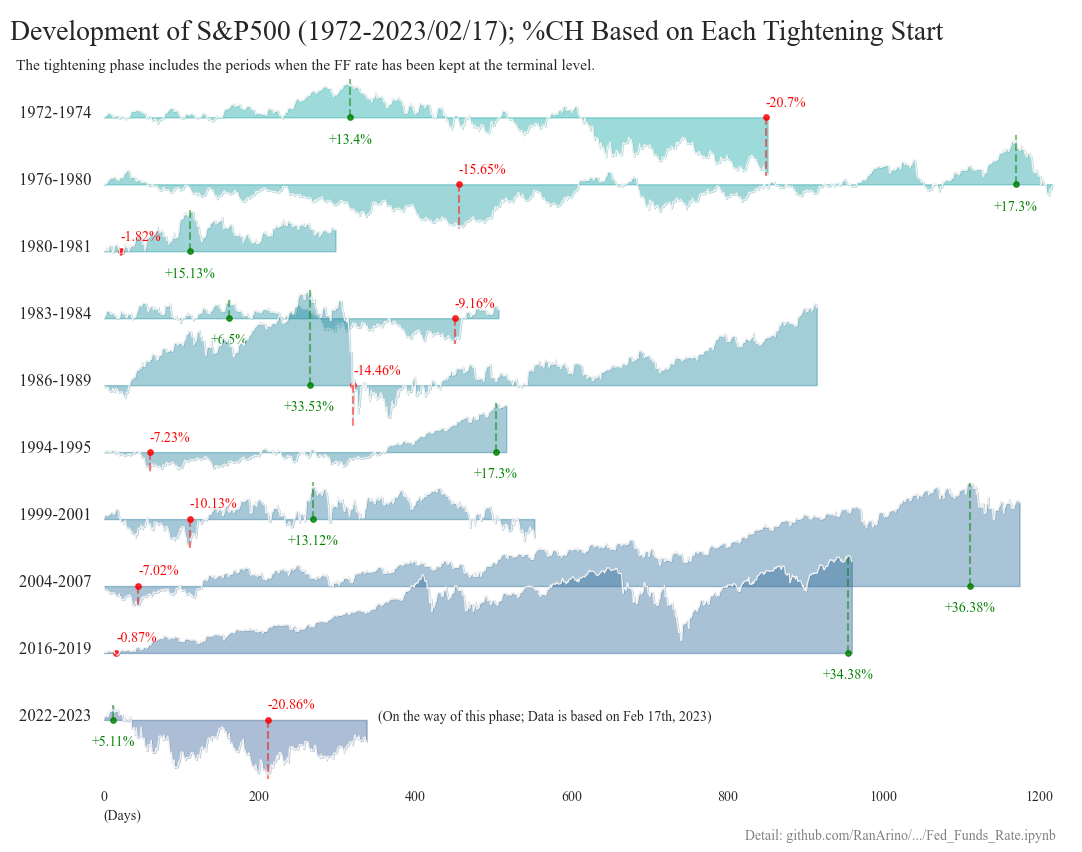

In [53]:
# Ridgeplots (Tightening Phase)
phases = list(df_02_tight.columns)
colors = ['#0BA5A4', '#0F9DA2', '#1395A1', '#178D9F', '#1B859E',
          '#1E7D9C', '#22759B', '#266D99', '#2A6598', '#2E5D96']
title = 'Development of S&P500 (1972-2023/02/17); %CH Based on Each Tightening Start'
subtitle = 'The tightening phase includes the periods when the FF rate has been kept at the terminal level.'
#fig_name =  'FFR02_Tight_Ridge'
fig_name = None

ridgeplots(phase_name='Tightening', df_d=df_02_tight, cats=phases, colors=colors, fig_size=(12.5, 10),
           title=title, subtitle=subtitle, fig_name=fig_name)

# add text about the current tightening phase
x_text = df_02[df_02["FF Rate Phase"] == 'Tightening'].iloc[-1]['Period(Days)']
plt.text(x=x_text+15, y=0, s='(On the way of this phase; Data is based on Feb 17th, 2023)')

# add text about the caption
plt.text(x=1220, y=-42, s='Detail: github.com/RanArino/.../Fed_Funds_Rate.ipynb', ha='right', c='grey')

#plt.savefig('FFR02_Tight_Ridge', bbox_inches='tight')

#### Table: Summary of S&P500 Perf. on Each Phase<a id='FFR02_Tight_Table'></a>

In [54]:
# load dataframe as the impage

#dfi.export(obj=df_02[df_02['FF Rate Phase'] == 'Tightening'].reset_index(drop=True), 
#           filename='FFR02_Tight_Table.png', fontsize=9, table_conversion='matplotlib')

df_02[df_02['FF Rate Phase'] == 'Tightening'].reset_index(drop=True)

,FF Rate Phase,Start Date,End Date,Period(Days),%Chg S&P500,Bottom(AfterDays),Bottom(%),Peak(AfterDays),Peak(%)
0,Tightening,1972-03-01,1974-06-30,851,-19.89,849.0,-20.70,316.0,13.40
1,Tightening,1976-12-01,1980-03-31,1216,-0.39,455.0,-15.65,1169.0,17.30
2,Tightening,1980-08-07,1981-05-31,297,7.53,22.0,-1.82,111.0,15.13
3,Tightening,1983-05-02,1984-09-19,506,2.98,450.0,-9.16,161.0,6.50
4,Tightening,1986-12-04,1989-06-05,914,27.26,320.0,-14.46,264.0,33.53
5,Tightening,1994-02-04,1995-07-05,516,16.49,59.0,-7.23,503.0,17.30
6,Tightening,1999-06-30,2001-01-02,552,-6.52,110.0,-10.13,268.0,13.12
7,Tightening,2004-06-30,2007-09-17,1174,29.44,44.0,-7.02,1111.0,36.38
8,Tightening,2016-12-14,2019-07-31,959,32.27,16.0,-0.87,954.0,34.38
9,Tightening,2022-03-17,2023-02-17,337,-7.53,210.0,-20.86,12.0,5.11


#### Box: Distribution of S&P500 Perf. (Tightening Start Day = 0%) <a id='FFR02_Tight_Box'></a>

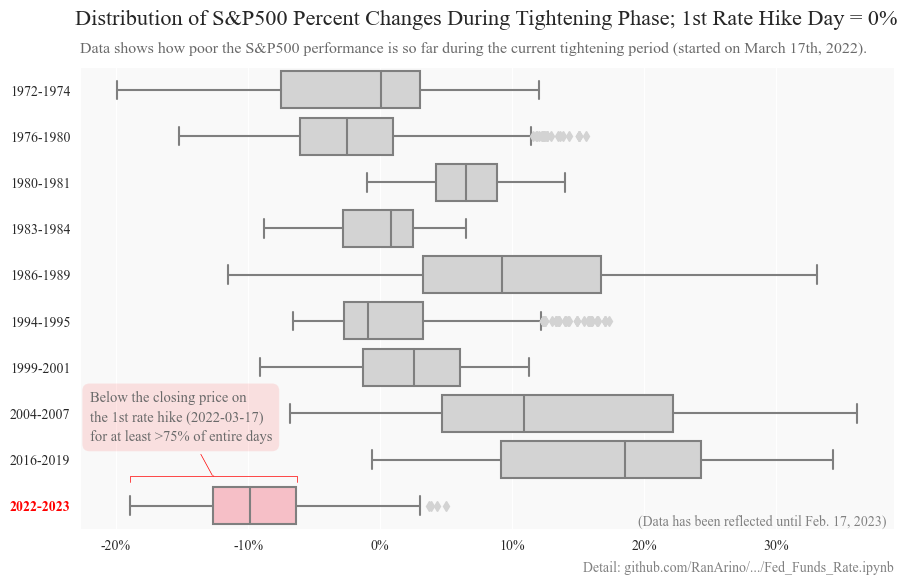

In [56]:
# define the palette; change color for a specific data
my_palette = {x: 'lightpink' if x == '2022-2023' else 'lightgrey' for x in df_02_tight.columns}

fig, ax = plt.subplots(figsize=(10.5, 6))
sns.boxplot(ax=ax, data=df_02_tight, orient='h', palette=my_palette,
            flierprops={'markerfacecolor': 'lightgrey', 'markeredgecolor': 'lightgrey'})
fig.suptitle(t='Distribution of S&P500 Percent Changes During Tightening Phase; 1st Rate Hike Day = 0%', x=0.12, y=0.975, fontsize=16, ha='left', va='top')
ax.set_title('Data shows how poor the S&P500 performance is so far during the current tightening period (started on March 17th, 2022).', fontsize=11.5, loc='left', pad=10, color='dimgrey')

# add message about the data period 
ax.text(0.99, 0.0, s='(Data has been reflected until Feb. 17, 2023)', fontsize=10, color='grey',
        ha='right', va='bottom', transform=ax.transAxes)

# add comment
ax.annotate('Below the closing price on \nthe 1st rate hike (2022-03-17) \nfor at least >75% of entire days', 
            xy=(-12.6, 8.4), xytext=(-22, 7.6), ha='left', color='dimgrey', fontsize=10.5, linespacing=1.5,
            bbox=dict(facecolor='red', alpha=0.1, pad=0.5, boxstyle='round'),
            arrowprops=dict(arrowstyle='-', lw=0.5, color='red'))

# add braknet
ax.annotate('', xy=(-12.6, 8.36), xytext=(-12.6, 8.35), 
            arrowprops=dict(arrowstyle='-[, widthB=6, lengthB=0.4', lw=0.5, color='red'))

# add percentage to x ticks 
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.0f}%"))

# format change for the last column name
for label in ax.get_yticklabels():
    if label.get_text() == "2022-2023":
        label.set_fontweight('bold')
        label.set_color('red')
        
# add data source
fig.text(1.0, -0.1, s='Detail: github.com/RanArino/.../Fed_Funds_Rate.ipynb', fontsize=10, color='grey',
        ha='right', va='bottom', transform=ax.transAxes)

# save figure
#fig.savefig('FFR02_Tight_Box.png')

#### Table: Summary of Statistics <a id='FFR02_Tight_BasicStat_Table'></a>  

In [57]:
# observe the basic statistics
df_02_tight_stat = df_02_tight.describe().rename(index={'count': 'periods'}).T

# define the color map
cmap=LinearSegmentedColormap.from_list('rg',["pink", "w", "lightgreen"], N=256)

df_02_tight_stat_color = df_02_tight_stat.style.background_gradient(axis=None, cmap=cmap, subset=df_02_tight_stat.columns[1:])

# change the format of the 'periods' column
df_02_tight_stat_color = df_02_tight_stat_color.format('{:.0f} days', na_rep='MISS', subset=['periods'])
# change the format of the other columns
df_02_tight_stat_color = df_02_tight_stat_color.format('{:.2f}%', na_rep='MISS', 
                                                       subset=list(df_02_tight_stat_color.columns[1:]))

df_02_tight_stat_color

,periods,mean,std,min,25%,50%,75%,max
1972-1974,852 days,-1.81%,7.57%,-19.89%,-7.52%,0.08%,2.98%,12.01%
1976-1980,1217 days,-2.34%,5.72%,-15.21%,-6.03%,-2.50%,0.99%,15.56%
1980-1981,298 days,6.42%,3.37%,-0.99%,4.25%,6.51%,8.86%,13.97%
1983-1984,507 days,-0.11%,3.46%,-8.81%,-2.79%,0.80%,2.50%,6.50%
1986-1989,915 days,10.34%,9.46%,-11.51%,3.24%,9.20%,16.70%,33.09%
1994-1995,517 days,1.05%,5.80%,-6.57%,-2.71%,-0.92%,3.26%,17.30%
1999-2001,553 days,2.25%,4.67%,-9.13%,-1.30%,2.58%,6.02%,11.27%
2004-2007,1175 days,12.67%,10.70%,-6.80%,4.68%,10.89%,22.21%,36.13%
2016-2019,960 days,17.24%,8.98%,-0.64%,9.14%,18.55%,24.32%,34.29%
2022-2023,338 days,-9.12%,5.20%,-18.92%,-12.68%,-9.87%,-6.34%,4.99%


#### Ridge Now: Development of S&P500 <a id='FFR02_Tight_Ridge_Now'></a>

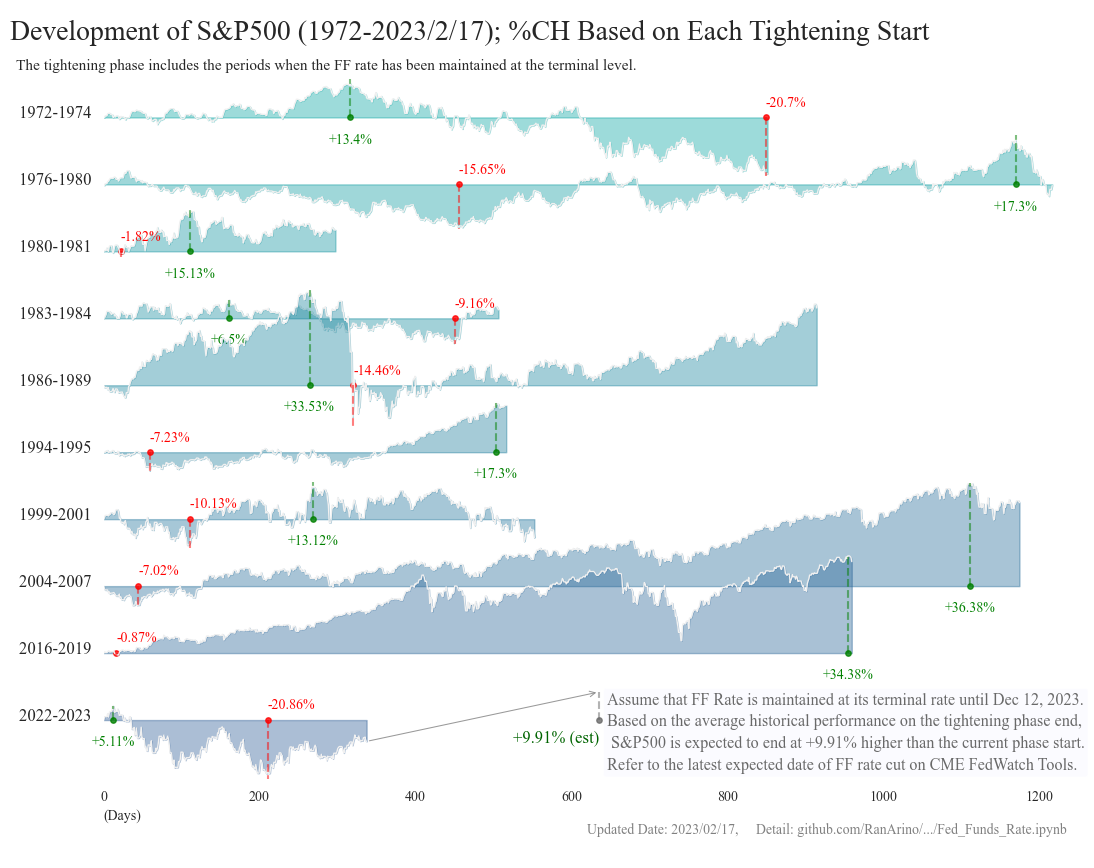

In [61]:
# Ridgeplots 02 (Tightening Phase)
phases = list(df_02_tight.columns)
colors = ['#0BA5A4', '#0F9DA2', '#1395A1', '#178D9F', '#1B859E',
          '#1E7D9C', '#22759B', '#266D99', '#2A6598', '#2E5D96']
title = 'Development of S&P500 (1972-2023/2/17); %CH Based on Each Tightening Start'
subtitle = 'The tightening phase includes the periods when the FF rate has been maintained at the terminal level.'
#fig_name =  'FFR02_Tight_Ridge02'
fig_name = None

ridgeplots(phase_name='Tightening', df_d=df_02_tight, cats=phases, colors=colors, fig_size=(12.5, 10),
           title=title, subtitle=subtitle, fig_name=fig_name)

# add expected end date & % change of the current tightening phase
start_date = datetime(2022, 3, 17)
exp_end_date = datetime(2023, 12, 12) # source: CME FedWatch (retrieved on 2023/02/20)
current_period = df_02[df_02["FF Rate Phase"] == 'Tightening'].iloc[-1]['Period(Days)']
exp_period = exp_end_date - start_date
current_change = df_02[df_02["FF Rate Phase"] == 'Tightening'].iloc[-1]['%Chg S&P500']
avg_change = df_01[df_01['FF Rate Phase'] == 'Tightening']['%Chg S&P500'].mean() # average % change of all tightening phases
ax_lst[-1].scatter(exp_period.days, 0, color='dimgrey', alpha=0.8, s=15)
ax_lst[-1].vlines(x=exp_period.days, ymin=0, ymax=avg_change, ls='--', colors='dimgrey', alpha=0.5)
ax_lst[-1].text(exp_period.days, -7.5, f"+{avg_change:.02f}% (est)", fontsize=12, color='darkgreen', ha='right')
ax_lst[-1].annotate('', xy=(exp_period.days, avg_change), xytext=(current_period, current_change),
                    arrowprops=dict(arrowstyle='->', lw=0.75, color='grey', alpha=0.8))

# add brief description
ax_lst[-1].text(x=exp_period.days+10, y=10, color='dimgrey', fontsize=11.7, ha='left', va='top', linespacing = 1.5,
                bbox=dict(facecolor='ghostwhite', alpha=0.5, pad=0.2, boxstyle='round'),
                s='Assume that FF Rate is maintained at its terminal rate until Dec 12, 2023.\n'+
                  'Based on the average historical performance on the tightening phase end,\n'+
                  ' S&P500 is expected to end at +9.91% higher than the current phase start.\n'+
                  'Refer to the latest expected date of FF rate cut on CME FedWatch Tools.')

# add caption
plt.text(1.15, -0.075, s='Updated Date: 2023/02/17,     Detail: github.com/RanArino/.../Fed_Funds_Rate.ipynb', fontsize=10, color='grey',
        ha='right', va='bottom', transform=ax.transAxes)

#plt.savefig('FFR02_Tight_Ridge_Now', bbox_inches='tight')

<br>
<hr style="border:0.5px solid brack">
<br>

### (2)-2: Easing Phase <a id='2_ease'></a>

[Top](#top)

In [29]:
# Easing phase
df_02_ease = pd.DataFrame()
for d in df_02[df_02['FF Rate Phase'] == 'Easing'].values:
    start_date = d[1]
    end_date = d[2]
    name = f"{start_date.year}-{end_date.year}"
    each_phase = pd.DataFrame()
    each_phase['Date'] = pd.date_range(start=start_date, end=end_date)
    each_phase = each_phase.merge(right=sp500[['Date', 'Close']], how='left', on='Date').fillna(method='ffill')
    each_phase[name] = each_phase['Close'].apply(func=convert_per_change, base=float(each_phase['Close'].loc[0]))
    df_02_ease = pd.concat([df_02_ease, each_phase[name]], axis=1)

df_02_ease.head(10)

,1974-1975,1980-1980,1981-1983,1984-1986,1989-1992,1995-1996,2001-2002,2007-2008,2019-2020
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,-2.00,0.49,-1.35,-1.07,0.84,0.43,-1.06,0.61,-0.73
2,-2.06,-0.03,-1.28,-1.07,0.77,0.43,-3.65,-0.07,-0.73
3,-2.06,-0.03,-1.10,-1.07,0.76,0.43,-3.65,0.39,-0.73
4,-2.74,-0.03,-0.14,-1.31,0.76,0.58,-3.65,0.39,-3.68
5,-2.74,-0.03,-0.14,-1.10,0.76,0.14,-3.84,0.39,-2.43
6,-2.74,-1.95,-0.14,-0.71,0.62,1.25,-3.47,-0.13,-2.36
7,-5.73,-0.96,-0.13,-0.30,-0.10,1.27,-2.54,-0.17,-0.52
8,-5.28,0.91,-0.33,-0.82,-0.13,1.07,-1.54,0.37,-1.18
9,-7.01,1.86,-0.07,-0.82,-1.28,1.07,-2.15,0.76,-1.18


#### Ridge: Development of S&P500 <a id='FFR02_Ease_Ridge'></a>

Text(1.15, -0.075, 'Detail: github.com/RanArino/.../Fed_Funds_Rate.ipynb')

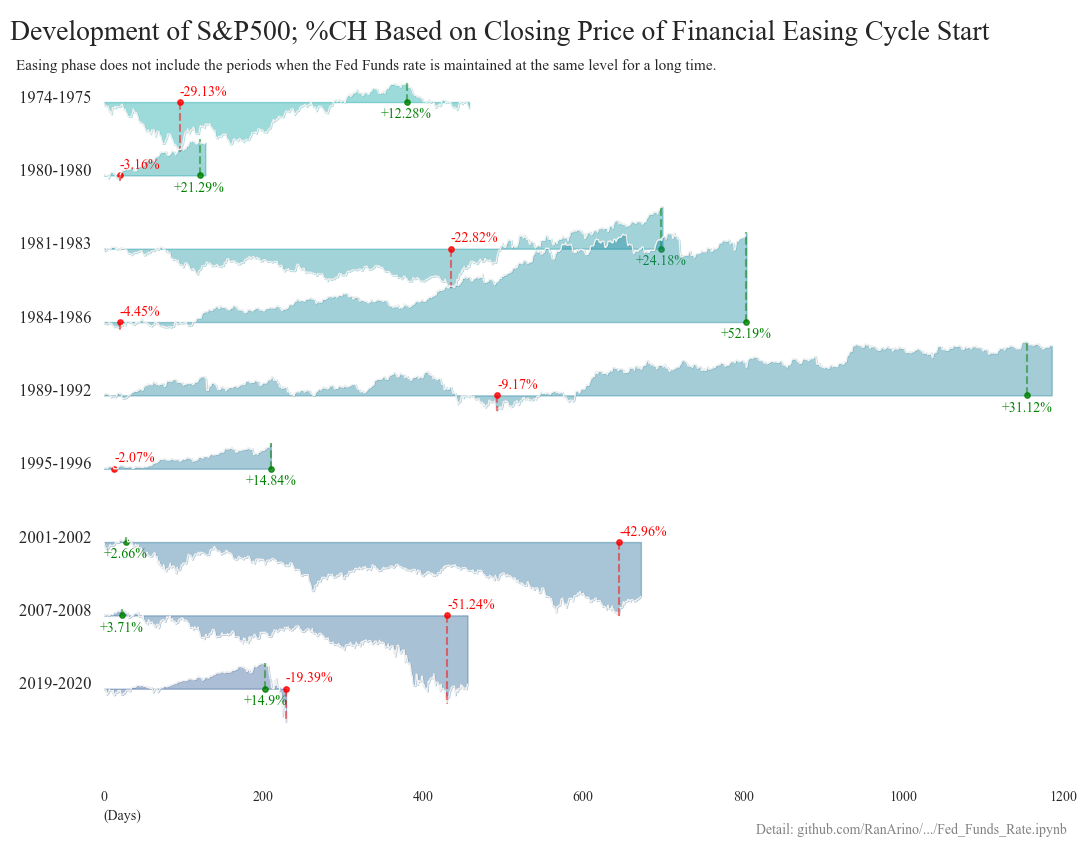

In [30]:
# Ridgeplots (Easing Phase)
phases = list(df_02_ease.columns)
colors = ['#0BA5A4', '#0F9CA2', '#1493A1', '#188A9F', '#1D819D',
          '#21789B', '#256F9A', '#2A6698', '#2E5D96']
title = 'Development of S&P500; %CH Based on Closing Price of Financial Easing Cycle Start'
subtitle = 'Easing phase does not include the periods when the Fed Funds rate is maintained at the same level for a long time.'
#fig_name =  'FFR02_Ease_Ridge'
fig_name = None

ridgeplots(phase_name='Easing', df_d=df_02_ease, cats=phases, colors=colors, fig_size=(12.5, 10),
           title=title, subtitle=subtitle, fig_name=fig_name)

# add text about the caption
plt.text(1.15, -0.075, s='Detail: github.com/RanArino/.../Fed_Funds_Rate.ipynb', fontsize=10, color='grey',
        ha='right', va='bottom', transform=ax.transAxes)

#plt.savefig('FFR02_Ease_Ridge', bbox_inches='tight')

#### Table: Summary of S&P500 Perf.<a id='FFR02_Ease_Table'></a>

In [31]:
# load dataframe as the impage
#dfi.export(obj=df_02[df_02['FF Rate Phase'] == 'Easing'].reset_index(drop=True), 
#           filename='FFR02_Ease_Table.png', fontsize=9, table_conversion='matplotlib')

df_02[df_02['FF Rate Phase'] == 'Easing'].reset_index(drop=True)

,FF Rate Phase,Start Date,End Date,Period(Days),%Chg S&P500,Bottom(AfterDays),Bottom(%),Peak(AfterDays),Peak(%)
0,Easing,1974-07-01,1975-10-01,457,-3.59,95.0,-29.13,379.0,12.28
1,Easing,1980-04-01,1980-08-06,127,18.96,20.0,-3.16,120.0,21.29
2,Easing,1981-06-01,1983-05-01,699,24.18,434.0,-22.82,697.0,24.18
3,Easing,1984-09-20,1986-12-03,804,51.58,20.0,-4.45,804.0,52.19
4,Easing,1989-06-06,1992-09-04,1186,28.63,492.0,-9.17,1155.0,31.12
5,Easing,1995-07-06,1996-01-31,209,14.81,13.0,-2.07,209.0,14.84
6,Easing,2001-01-03,2002-11-06,672,-31.45,645.0,-42.96,28.0,2.66
7,Easing,2007-09-18,2008-12-16,455,-39.91,430.0,-51.24,23.0,3.71
8,Easing,2019-08-01,2020-03-16,228,-19.21,228.0,-19.39,202.0,14.90


<br>
<hr style="border:0.5px solid brack">
<br>

### (2)-3: Pausing Phase <a id='2_pause'></a>

[Top](#top)

In [32]:
# Pausing phase
df_02_pause = pd.DataFrame()
for d in df_02[df_02['FF Rate Phase'] == 'Pausing'].values:
    start_date = d[1]
    end_date = d[2]
    name = f"{start_date.year}-{end_date.year}"
    each_phase = pd.DataFrame()
    each_phase['Date'] = pd.date_range(start=start_date, end=end_date)
    each_phase = each_phase.merge(right=sp500_df[['Date', 'Close']], how='left', on='Date').fillna(method='ffill')
    each_phase[name] = each_phase['Close'].apply(func=convert_per_change, base=float(each_phase['Close'].loc[0]))
    df_02_pause = pd.concat([df_02_pause, each_phase[name]], axis=1)

df_02_pause.head(10)

,1975-1976,1992-1994,1996-1999,2002-2004,2008-2016,2020-2022
0,0.00,0.00,0.00,0.00,0.00,0.00
1,2.54,0.00,-0.41,-0.88,-2.12,-5.18
2,2.54,0.00,-0.41,-0.88,-1.83,-4.74
3,2.54,-0.63,-0.41,-0.88,-1.83,-8.87
4,3.65,-0.17,0.47,-2.93,-1.83,-8.87
5,3.52,0.69,1.23,-2.18,-3.63,-8.87
6,4.92,0.60,1.80,-2.23,-4.56,-11.54
7,5.43,0.60,2.76,0.18,-4.01,-3.24
8,5.24,0.60,2.81,0.80,-4.01,-2.12
9,5.24,1.96,2.81,0.80,-3.50,3.99


#### Ridge: Development of S&P500 <a id='FFR02_Pause_Ridge'></a>

Text(3100, -70, 'Detail: github.com/RanArino/.../Fed_Funds_Rate.ipynb')

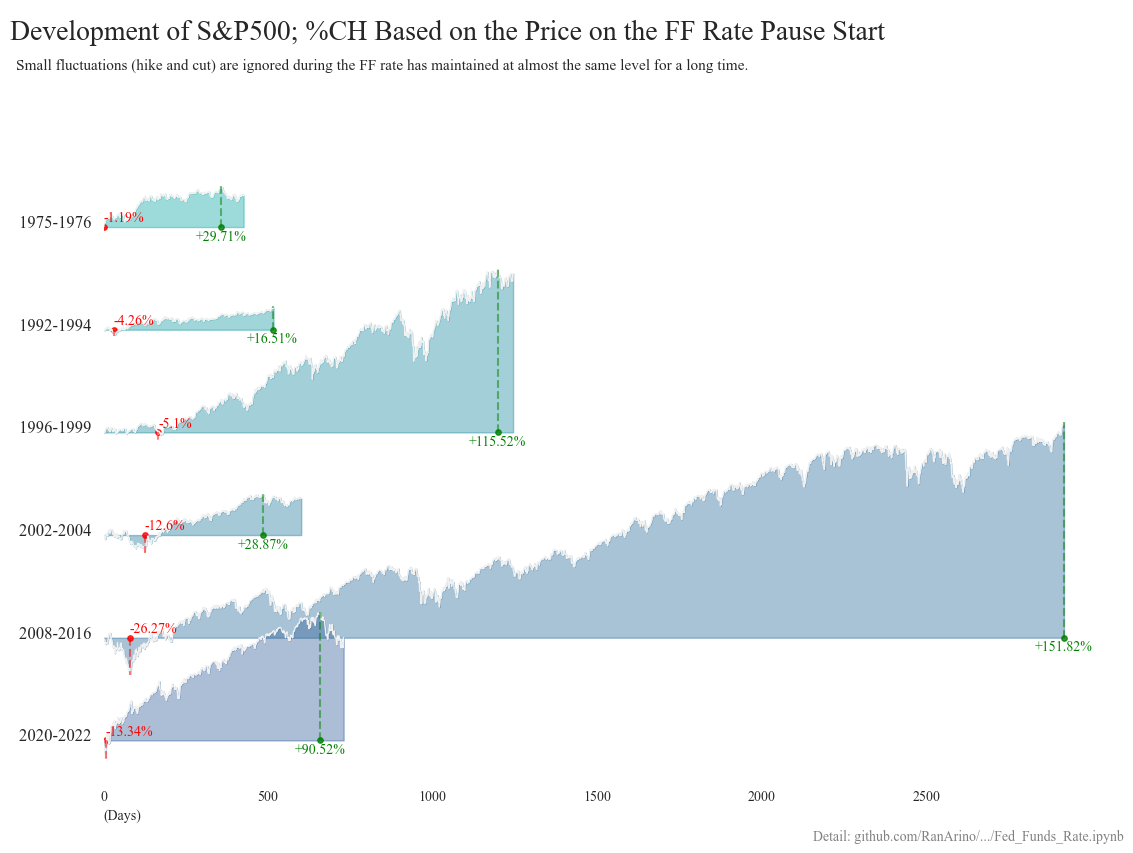

In [33]:
# Ridgeplots (Pausing Phase)
phases = list(df_02_pause.columns)
colors = ['#0BA5A4', '#1297A1', '#19889E',
          '#207A9C', '#276B99', '#2E5D96']
title = 'Development of S&P500; %CH Based on the Price on the FF Rate Pause Start'
subtitle = 'Small fluctuations (hike and cut) are ignored during the FF rate has maintained at almost the same level for a long time.'
#fig_name =  'FFR02_Pause_Ridge'
fig_name = None

ridgeplots(phase_name='Pausing', df_d=df_02_pause, cats=phases, colors=colors, fig_size=(12.5, 10),
           title=title, subtitle=subtitle, fig_name=fig_name)

# add text about the caption
plt.text(x=3100, y=-70, s='Detail: github.com/RanArino/.../Fed_Funds_Rate.ipynb', ha='right', c='grey')

#plt.savefig('FFR02_Pause_Ridge', bbox_inches='tight')

#### Table: Summary of S&P500 Perf.  <a id='FFR02_Pause_Table'></a>

In [34]:
# load dataframe as the impage
#dfi.export(obj=df_02[df_02['FF Rate Phase'] == 'Pausing'].reset_index(drop=True), 
#           filename='FFR02_Pause_Table.png', fontsize=9, table_conversion='matplotlib')

df_02[df_02['FF Rate Phase'] == 'Pausing'].reset_index(drop=True)

,FF Rate Phase,Start Date,End Date,Period(Days),%Chg S&P500,Bottom(AfterDays),Bottom(%),Peak(AfterDays),Peak(%)
0,Pausing,1975-10-02,1976-11-30,425,21.81,0.0,-1.19,356.0,29.71
1,Pausing,1992-09-05,1994-02-03,516,15.26,30.0,-4.26,513.0,16.51
2,Pausing,1996-02-01,1999-06-29,1244,111.67,166.0,-5.10,1197.0,115.52
3,Pausing,2002-11-07,2004-06-29,600,25.87,125.0,-12.60,484.0,28.87
4,Pausing,2008-12-17,2016-12-13,2918,151.18,79.0,-26.27,2918.0,151.82
5,Pausing,2020-03-17,2022-03-16,729,72.30,6.0,-13.34,658.0,90.52


<br>
<hr style="border:0.5px solid brack">
<br>

### (3): Performance of US Major Indices; from the Day of FF Rate Hike to the Terminal Rate. <a id='2_3'></a>

[top](#Content:)

In [104]:
# create new column to write down new rate state
df['FFR_Phase02'] = np.nan

"""
Starting from the day of the first FF rate hike to the day of reaching the terminal rate.
This analysis focuses more on the consecutive and longer FF target rate hikes.
"""

start_end_date = [
    ['1973-01-02', '1974-05-01'], ['1977-08-16', '1980-03-18'], ['1988-03-30', '1989-05-17'], 
    ['1994-02-04', '1995-02-01'], ['1999-06-30', '2000-05-16'], ['2004-06-30', '2006-06-29'], 
    ['2016-12-14', '2018-12-20'], ['2022-03-17', '2023-02-02']
]

for set_dates in start_end_date:
    df.loc[(df['Date'] >= set_dates[0]) & (df['Date'] <= set_dates[1]), 'FFR_Phase02'] = 'Hike'

df['FFR_Phase02'].fillna('Other', inplace=True)
df

,Date,SP500,NDQ100,DJI,RUT2000,FF_Rate,FFR_Phase02
0,1971-01-01,NaN,NaN,NaN,NaN,NaN,Other
1,1971-01-02,NaN,NaN,NaN,NaN,NaN,Other
2,1971-01-03,NaN,NaN,NaN,NaN,NaN,Other
3,1971-01-04,91.150002,NaN,NaN,NaN,NaN,Other
4,1971-01-05,91.800003,NaN,NaN,NaN,NaN,Other
...,...,...,...,...,...,...,...
19021,2023-01-29,4070.560059,12166.599609,33978.078125,1911.459961,4.50,Hike
19022,2023-01-30,4017.770020,11912.389648,33717.089844,1885.719971,4.50,Hike
19023,2023-01-31,4076.600098,12101.929688,34086.039062,1931.944824,4.50,Hike
19024,2023-02-01,4119.209961,12363.099609,34092.960938,1960.810059,4.50,Hike


In [105]:
# create new df
"""
(1) FF Rate Phase:     One of three interest rate phases; Tightening, Easing, Pausing
(2) Start Date:     Date of starting the new rate phase
(3) End Date:       Date of ending the rate phase
(4) Period of Years:    How long each rate phase is (year)
(5) %Chg S&P500:   Percentage change S&P500 from start_date to end_date.
(6) %Chg / Periods: Estimated yearly percentage change S&P500 from start_date and end_date; calculated by (5) / (4)
"""

df_03_hike = pd.DataFrame(columns=['Start Date', 'End Date', 'Periods(Month)', 
                                   'Terminal Rate', 'Rate Increase(%)', 'Hike Speed(%/m)', 
                                   'SP500(%)', 'NDQ100(%)', 'DJI(%)', 'RUT2000(%)'])

values = [] # a list of all column values
row_num = 0
for d_list in start_end_date:
    start_date = datetime.strptime(d_list[0], '%Y-%m-%d')
    values.append(start_date)
    end_date = datetime.strptime(d_list[1], '%Y-%m-%d')
    values.append(end_date)
    period_month = round((end_date - start_date).days / 30, 1)
    terminal_rate = float(df[df.Date == end_date]['FF_Rate'])
    rate_increase = terminal_rate - float(df[df.Date == start_date]['FF_Rate'])
    hike_speed = round(rate_increase / period_month, 2)
    values += [period_month, terminal_rate, rate_increase, hike_speed]
       
    for index in ['SP500', 'NDQ100', 'DJI', 'RUT2000']:
        start_price = float(df[df.Date == start_date][index])
        end_price = float(df[df.Date == end_date][index])
        per_change = (end_price - start_price) / start_price * 100
        values.append(per_change)
        
    # add a list of values to df
    df_03_hike.loc[row_num] = values
    # reset a list of values
    values = []
    # increment number of df rows
    row_num += 1        
    
    
df_03_hike

,Start Date,End Date,Periods(Month),Terminal Rate,Rate Increase(%),Hike Speed(%/m),SP500(%),NDQ100(%),DJI(%),RUT2000(%)
0,1973-01-02,1974-05-01,16.1,13.00,7.25,0.45,-22.569268,NaN,NaN,NaN
1,1977-08-16,1980-03-18,31.5,20.00,14.00,0.44,6.517952,NaN,NaN,NaN
2,1988-03-30,1989-05-17,13.8,10.00,3.25,0.24,23.020887,22.424911,24.483348,20.167111
3,1994-02-04,1995-02-01,12.1,6.00,2.75,0.23,0.125582,2.410184,-0.616308,-5.415222
4,1999-06-30,2000-05-16,10.7,6.50,1.50,0.14,6.798966,58.783422,-0.330236,10.553229
5,2004-06-30,2006-06-29,24.3,5.25,4.00,0.16,11.573054,4.544256,7.237993,20.760073
6,2016-12-14,2018-12-20,24.5,2.50,1.75,0.07,9.503474,26.862648,15.496101,-2.213833
7,2022-03-17,2023-02-02,10.7,4.75,4.25,0.40,-5.256743,-9.317215,-1.237851,-3.089561


<br>
<hr style="border:0.5px solid brack">
<br>

# Reference: <a id='reference'></a>

[Top](#top)

- <b>S&P500</b>: [yahoo!finance](https://finance.yahoo.com/quote/%5EGSPC/)
- <b>Nasdaq100</b>: [yahoo!finance](https://finance.yahoo.com/quote/%5ENDX/)
- <b>Dow Jones</b>: [yahoo!finance](https://finance.yahoo.com/quote/%5EDJI/) & [Investing.com](https://ca.investing.com/indices/us-30-historical-data)
- <b>Russell2000</b>: [yahoo!finance](https://finance.yahoo.com/quote/%5ERUT/)
- <b>Fed Target Rate</b>: 
    - [FRED.1](https://fred.stlouisfed.org/series/DFEDTAR) (from 1983-2008)
    - [FRED.2](https://fred.stlouisfed.org/series/DFEDTARU) (from 2008-)
    - [Changes in the intended federal funds rate, 1971-1992](https://www.federalreserve.gov/foia/files/20190829-changes-intended-federal-funds-rate.pdf) (from 1971-1982)
    - [Trading Economics](https://tradingeconomics.com/united-states/interest-rate)(from 1971-1982)
- <b>CME FedWatch</b>: ['Target Rate' >> 'Probabilities'](https://www.cmegroup.com/markets/interest-rates/cme-fedwatch-tool.html) 
- <b>Recession period</b>: 
    - [NBER](https://www.nber.org/research/data/us-business-cycle-expansions-and-contractions)
    - [Investopedia](https://www.investopedia.com/articles/economics/08/past-recessions.asp)